In [8]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [39]:
def distributionMeasures(df, feature, title, symb):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sb.boxplot(x=feature, data=df, ax=ax[0])
    ax[0].set(yticks=[])
    sb.histplot(x=feature, data=df, ax=ax[1])
    ax[1].set_xlabel(feature, fontsize=16)
    plt.axvline(df[feature].mean(), color='green', linewidth=2.2, label='Mean =' + str(np.round(df[feature].mean(),1)) + symb)
    plt.axvline(df[feature].median(), color='red', linewidth=2.2, label='Median ='+ str(np.round(df[feature].median(),1)) + symb)
    plt.axvline(df[feature].mode()[0], color='purple', linewidth=2.2, label='Mode ='+ str(np.round(df[feature].mode()[0],1)) + symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()

In [6]:
test_data_path = '/mnt/c/Users/marti/Downloads/TestData.csv'
test_data = pd.DataFrame(columns = ["Board_num", "Timestamp_0", "adc_0", "adc_1", "adc_2", "class"])
data = pd.read_csv(test_data_path)
test_data['Board_num'] = data.iloc[:, 0]
test_data['Timestamp_0'] = data.iloc[:, 1]
test_data['adc_0'] = data.iloc[:, 2]
test_data['adc_1'] = data.iloc[:, 3]
test_data['adc_2'] = data.iloc[:, 4]
test_data['class'] = data.iloc[:, 5]

In [7]:
test_data.head()

,Board_num,Timestamp_0,adc_0,adc_1,adc_2,class
0,Board1,314708185.0,1.621802,1.644360,1.490479,0.0
1,Board0,299207471.0,1.557349,1.490479,1.401050,0.0
2,Board1,314713207.0,1.523511,1.473559,1.493701,0.0
3,Board0,299212489.0,1.437305,1.514648,1.492895,0.0
4,Board1,314718224.0,1.442139,1.440527,1.499341,0.0


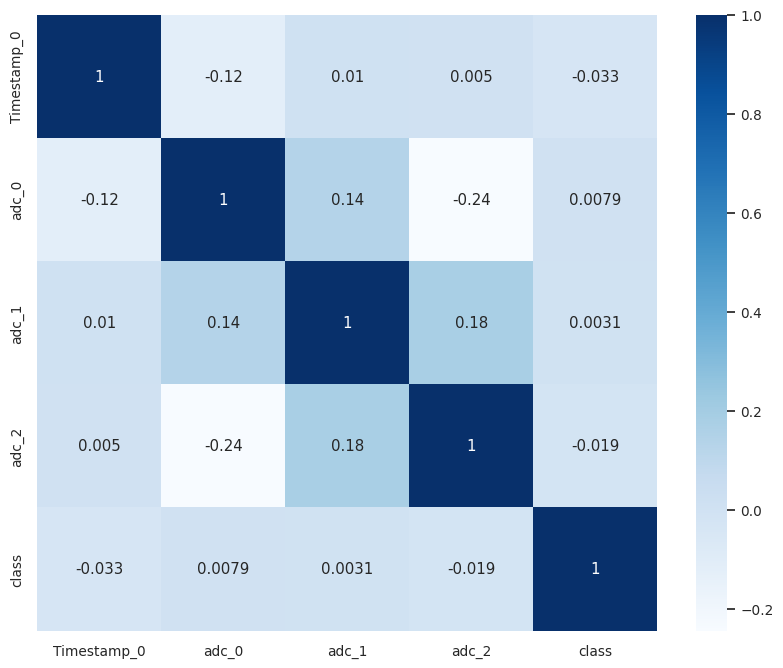

In [14]:
# assuming your DataFrame is called `df`
correlation_matrix = test_data.corr()
sb.set(font_scale=0.9)
fig, ax = plt.subplots(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='Blues', ax=ax)
plt.show()

In [15]:
class_corr = correlation_matrix['class'].sort_values(ascending=False)
print('\033[1m{:<15}{:<15}\033[0m'.format('Column Name', 'Correlation'))
for idx, (col, corr) in enumerate(class_corr.items()):
    if idx < 10:
        print('{:<15}{:<15.4f}'.format(col, corr))

Column Name    Correlation    
class          1.0000         
adc_0          0.0079         
adc_1          0.0031         
adc_2          -0.0187        
Timestamp_0    -0.0329        


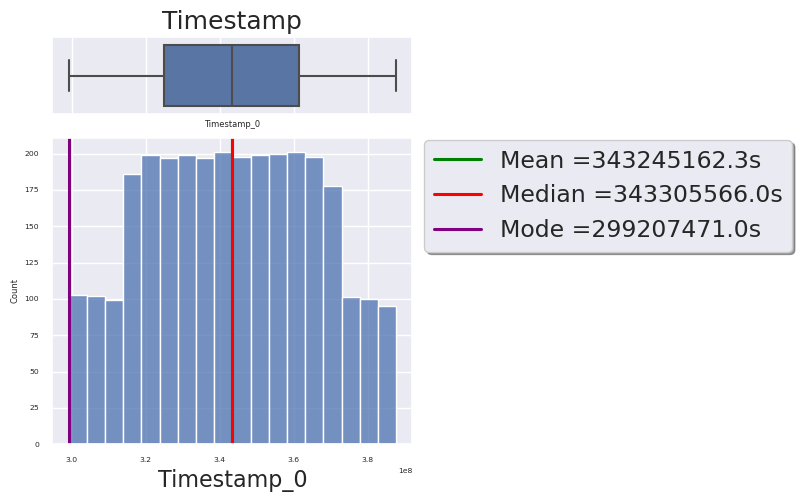

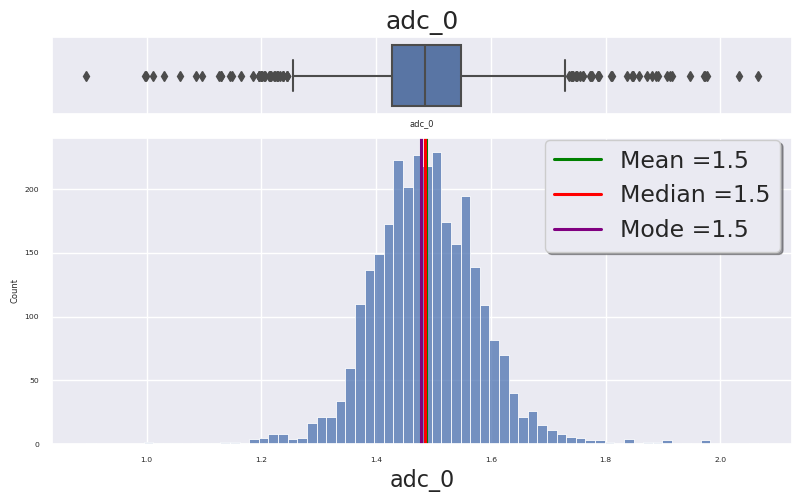

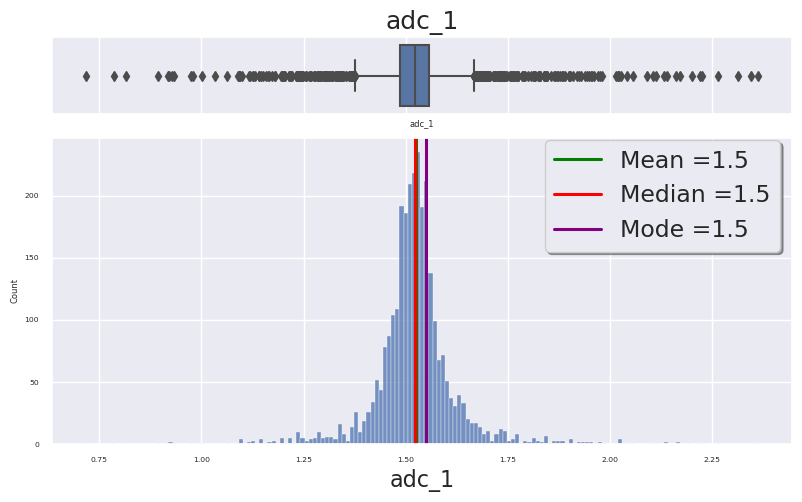

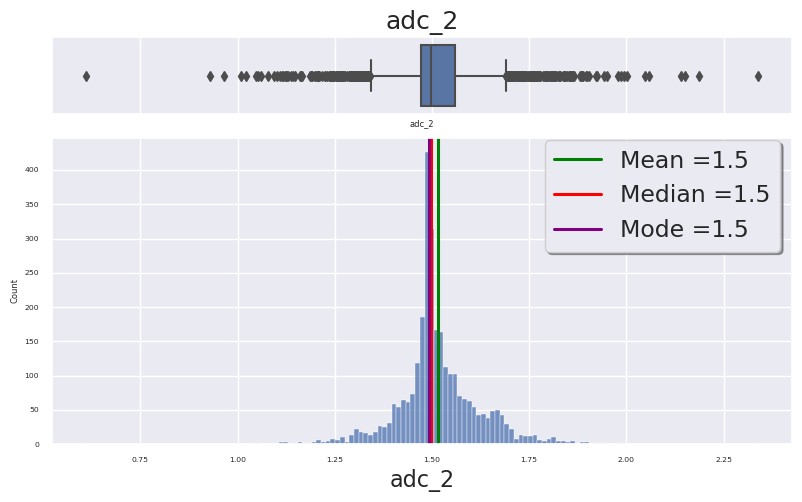

In [43]:
distributionMeasures(test_data, 'Timestamp_0', 'Timestamp', 's')
distributionMeasures(test_data, 'adc_0', 'adc_0', '')
distributionMeasures(test_data, 'adc_1', 'adc_1', '')
distributionMeasures(test_data, 'adc_2', 'adc_2', '')

<AxesSubplot:title={'center':'ADC values over time'}, xlabel='Timestamp', ylabel='ADC value'>

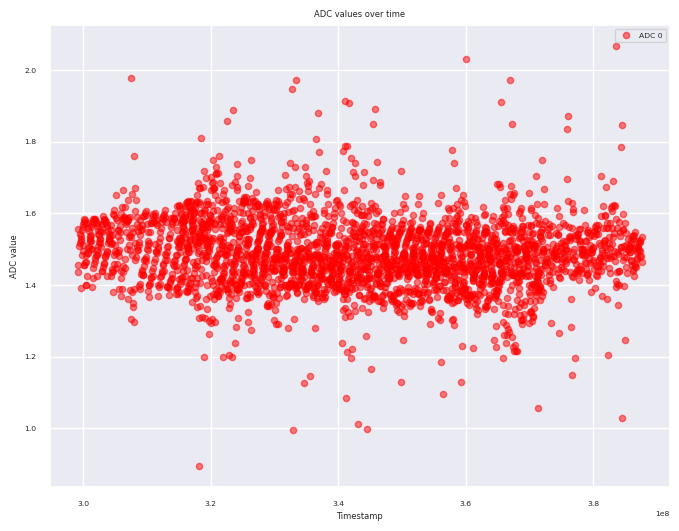

In [66]:
test_data.plot(x='Timestamp_0', y='adc_0', kind='scatter', color='red', alpha=0.5, figsize=(8,6), title='ADC values over time', xlabel='Timestamp', ylabel='ADC value', grid=True, label='ADC 0')

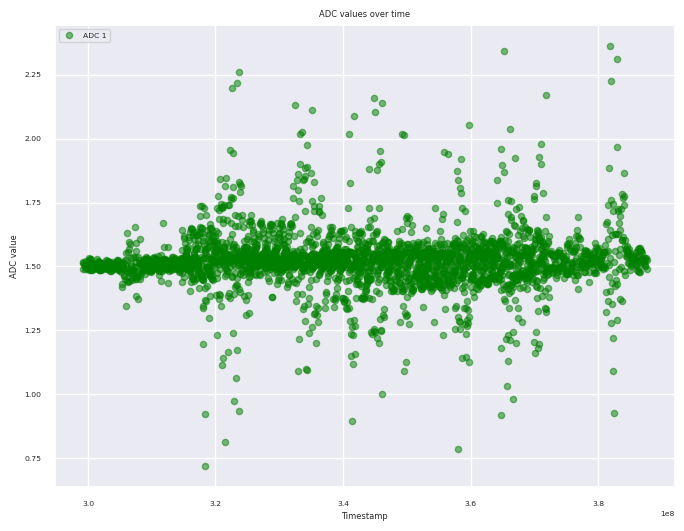

In [65]:
ax = test_data.plot(x='Timestamp_0', y='adc_1', kind='scatter', color='green', alpha=0.5, figsize=(8,6), title='ADC values over time', xlabel='Timestamp', ylabel='ADC value', grid=True, label='ADC 1')
plt.legend(loc = 'upper left')

<AxesSubplot:title={'center':'ADC values over time'}, xlabel='Timestamp', ylabel='ADC value'>

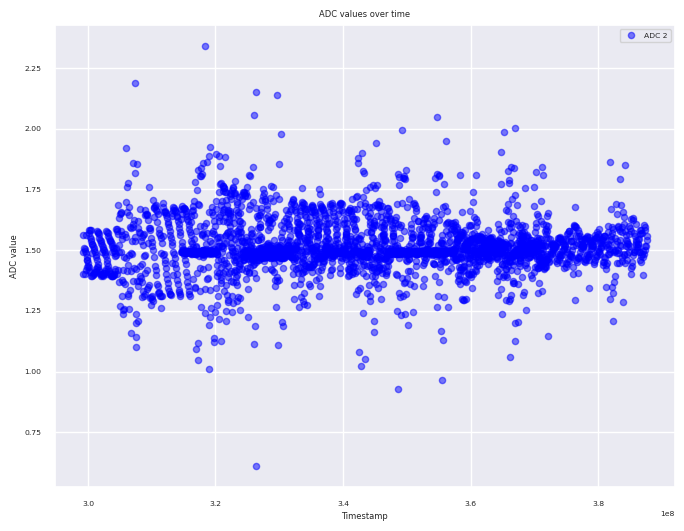

In [68]:
test_data.plot(x='Timestamp_0', y='adc_2', kind='scatter', color='blue', alpha=0.5, figsize=(8,6), title='ADC values over time', xlabel='Timestamp', ylabel='ADC value', grid=True, label='ADC 2')

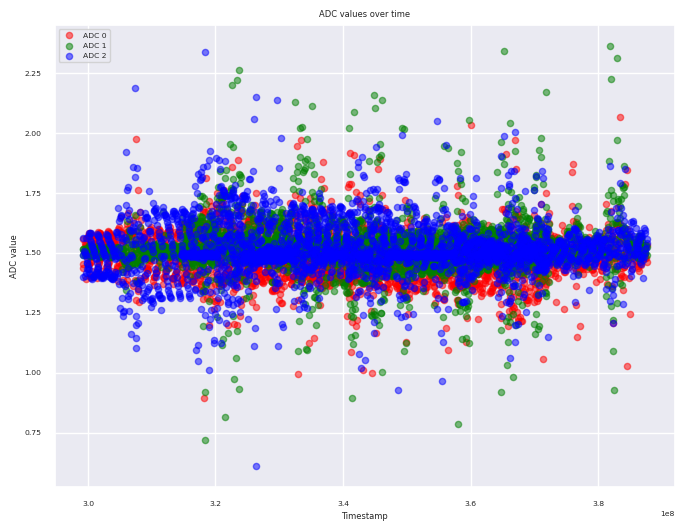

In [60]:
ax = test_data.plot(x='Timestamp_0', y='adc_0', kind='scatter', color='red', alpha=0.5, figsize=(8,6), title='ADC values over time', xlabel='Timestamp', ylabel='ADC value', grid=True, label='ADC 0')
test_data.plot(x='Timestamp_0', y='adc_1', kind='scatter', color='green', alpha=0.5, figsize=(8,6), title='ADC values over time', xlabel='Timestamp', ylabel='ADC value', grid=True, ax=ax, label='ADC 1')
test_data.plot(x='Timestamp_0', y='adc_2', kind='scatter', color='blue', alpha=0.5, figsize=(8,6), title='ADC values over time', xlabel='Timestamp', ylabel='ADC value', grid=True, ax=ax, label='ADC 2')
plt.legend(loc='upper left')


In [25]:
merged_test_data = pd.DataFrame(columns=['Timestamp_0', 'adc_0', 'adc_1', 'adc_2', 'class'])

board0_row = None
is_board0 = True

for index, row in test_data.iterrows():
    if is_board0:
        board0_row = row.drop('Board_num')
        is_board0 = False
    else:
        # merge board1 row with board0 row
        board1_row = row.drop(['Board_num', 'class'])
        board1_row.index = board1_row.index.map(lambda x: str(x) + '_board_1')  # add suffix to Board1 column names
        merged_row = board0_row.append(board1_row).to_frame().T
        merged_row['class'] = row['class']
        merged_test_data = merged_test_data.append(merged_row, ignore_index=True)
        merged_test_data = merged_test_data.append(merged_row, ignore_index=True)  # add explicit duplicate for Board1 row
        is_board0 = True

In [27]:
merged_test_data.head()

,Timestamp_0,adc_0,adc_1,adc_2,class,Timestamp_0_board_1,adc_0_board_1,adc_1_board_1,adc_2_board_1
0,314708185.0,1.621802,1.64436,1.490479,0.0,299207471.0,1.557349,1.490479,1.40105
1,314708185.0,1.621802,1.64436,1.490479,0.0,299207471.0,1.557349,1.490479,1.40105
2,314713207.0,1.523511,1.473559,1.493701,0.0,299212489.0,1.437305,1.514648,1.492895
3,314713207.0,1.523511,1.473559,1.493701,0.0,299212489.0,1.437305,1.514648,1.492895
4,314718224.0,1.442139,1.440527,1.499341,0.0,299217504.0,1.455029,1.517065,1.562183


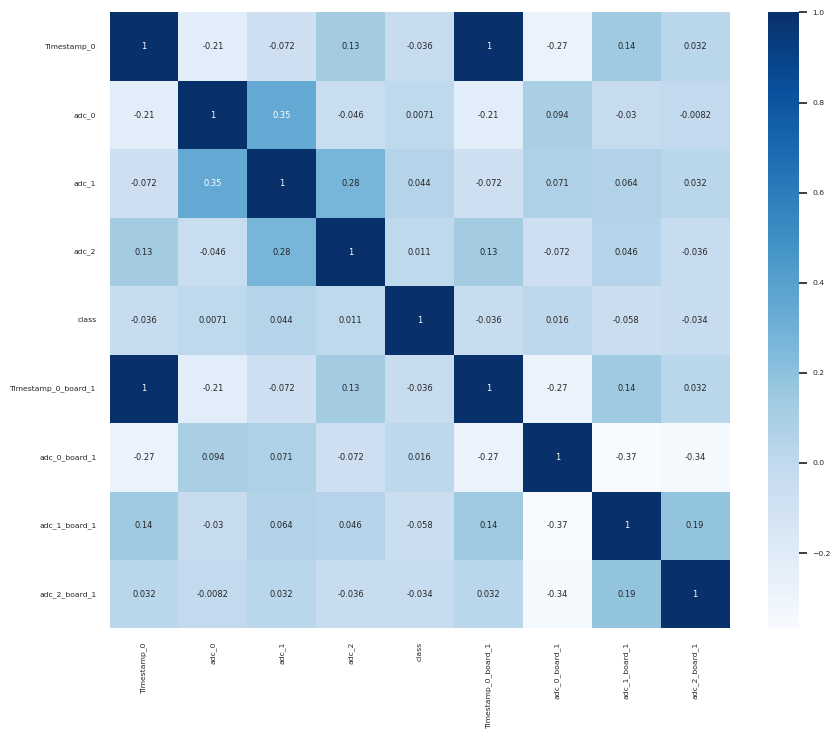

In [37]:
merged_test_data[['Timestamp_0', 'adc_0', 'adc_1', 'adc_2', 'Timestamp_0_board_1', 'adc_0_board_1', 'adc_1_board_1', 'adc_2_board_1']] = merged_test_data[['Timestamp_0', 'adc_0', 'adc_1', 'adc_2', 'Timestamp_0_board_1', 'adc_0_board_1', 'adc_1_board_1', 'adc_2_board_1']].astype(float)
correlation_matrix_merged = merged_test_data.corr()
sb.set(font_scale=0.5)
fig, ax = plt.subplots(figsize=(10, 8))
sb.heatmap(correlation_matrix_merged, annot=True, cmap='Blues', ax=ax)
plt.show()

In [38]:
class_corr = correlation_matrix_merged['class'].sort_values(ascending=False)
print('\033[1m{:<15}{:<15}\033[0m'.format('Column Name', 'Correlation'))
for idx, (col, corr) in enumerate(class_corr.items()):
    if idx < 10:
        print('{:<15}{:<15.4f}'.format(col, corr))

Column Name    Correlation    
class          1.0000         
adc_1          0.0440         
adc_0_board_1  0.0164         
adc_2          0.0114         
adc_0          0.0071         
adc_2_board_1  -0.0340        
Timestamp_0    -0.0364        
Timestamp_0_board_1-0.0364        
adc_1_board_1  -0.0576        


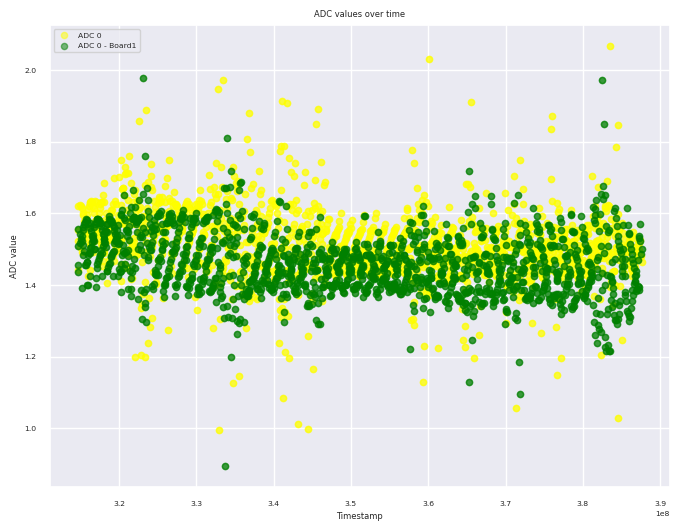

In [77]:
ax = merged_test_data.plot(x='Timestamp_0', y='adc_0', kind='scatter', color='yellow', alpha=0.5, figsize=(8,6), title='ADC values over time', xlabel='Timestamp', ylabel='ADC value', grid=True, label='ADC 0')
merged_test_data.plot(x='Timestamp_0', y='adc_0_board_1', kind='scatter', color='green', alpha=0.5, figsize=(8,6), title='ADC values over time', xlabel='Timestamp', ylabel='ADC value', grid=True, label='ADC 0 - Board1', ax = ax)

plt.legend(loc = 'upper left')

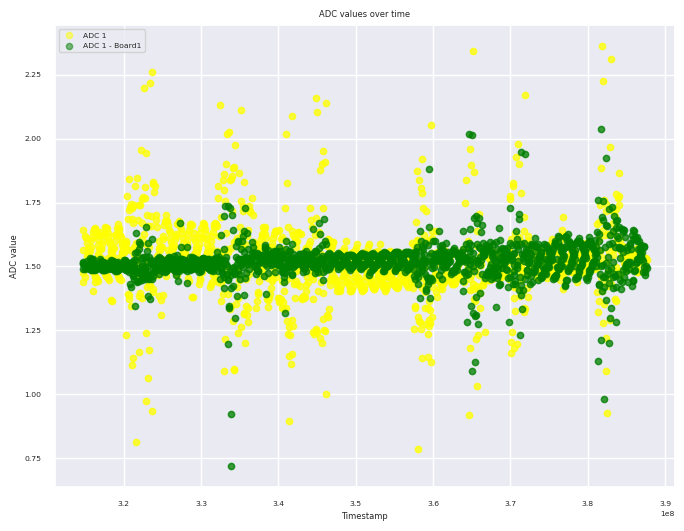

In [72]:
ax = merged_test_data.plot(x='Timestamp_0', y='adc_1', kind='scatter', color='yellow', alpha=0.5, figsize=(8,6), title='ADC values over time', xlabel='Timestamp', ylabel='ADC value', grid=True, label='ADC 1')
merged_test_data.plot(x='Timestamp_0', y='adc_1_board_1', kind='scatter', color='green', alpha=0.5, figsize=(8,6), title='ADC values over time', xlabel='Timestamp', ylabel='ADC value', grid=True, label='ADC 1 - Board1', ax = ax)

plt.legend(loc = 'upper left')

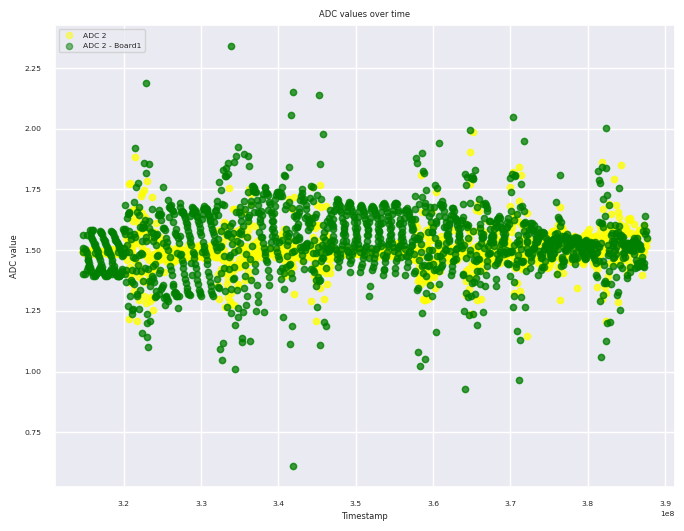

In [76]:
ax = merged_test_data.plot(x='Timestamp_0', y='adc_2', kind='scatter', color='yellow', alpha=0.5, figsize=(8,6), title='ADC values over time', xlabel='Timestamp', ylabel='ADC value', grid=True, label='ADC 2')
merged_test_data.plot(x='Timestamp_0', y='adc_2_board_1', kind='scatter', color='green', alpha=0.5, figsize=(8,6), title='ADC values over time', xlabel='Timestamp', ylabel='ADC value', grid=True, label='ADC 2 - Board1', ax = ax)

plt.legend(loc = 'upper left')